## Oil Production Forecasting

> How to Pose a Time Series Forecasting problem as a Supervised learning Algorithm!

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                index_col=0, parse_dates=True)

In [30]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


In [31]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

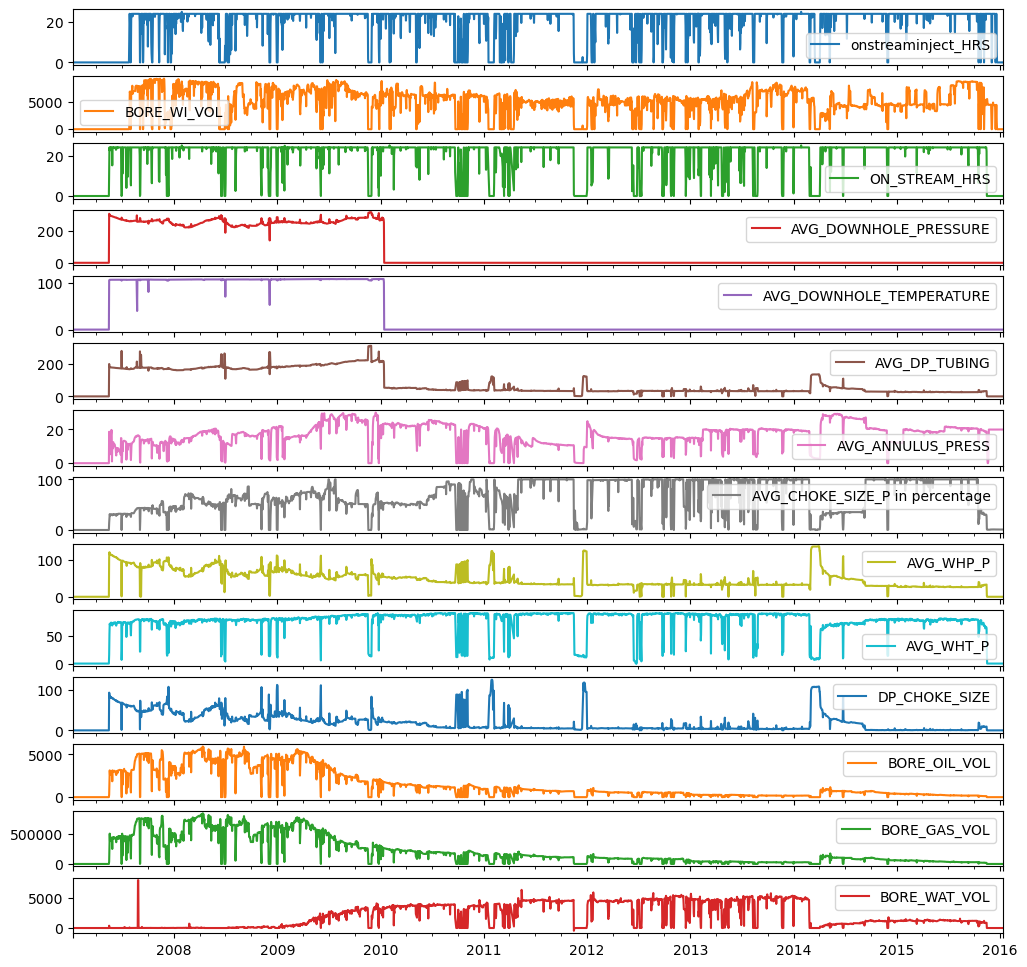

In [32]:
df.plot(subplots=True,figsize=(12,12))

In [33]:
output_col='BORE_OIL_VOL'

In [35]:
#Lets assume x and y are linearly related

In [36]:
df.corr()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
onstreaminject_HRS,1.000000,0.841863,0.721919,-0.008906,0.012351,0.009337,0.612743,0.633598,-0.023190,0.672484,-0.263239,0.182405,0.187947,0.411186
BORE_WI_VOL,0.841863,1.000000,0.664087,0.200564,0.221163,0.200725,0.557878,0.521919,0.093025,0.603670,-0.121651,0.368739,0.374942,0.280289
ON_STREAM_HRS,0.721919,0.664087,1.000000,0.151285,0.165454,0.143750,0.664548,0.736508,0.145377,0.890115,-0.150569,0.361124,0.371698,0.441695
AVG_DOWNHOLE_PRESSURE,-0.008906,0.200564,0.151285,1.000000,0.995501,0.959016,0.043809,-0.236868,0.607089,0.067182,0.570080,0.819920,0.816354,-0.447753
AVG_DOWNHOLE_TEMPERATURE,0.012351,0.221163,0.165454,0.995501,1.000000,0.952678,0.050419,-0.220456,0.600172,0.077749,0.556476,0.850241,0.845233,-0.456028
AVG_DP_TUBING,0.009337,0.200725,0.143750,0.959016,0.952678,1.000000,0.085105,-0.247804,0.700270,0.081012,0.651796,0.778941,0.774962,-0.403919
AVG_ANNULUS_PRESS,0.612743,0.557878,0.664548,0.043809,0.050419,0.085105,1.000000,0.424520,0.023069,0.637504,-0.203826,0.163663,0.165688,0.299597
AVG_CHOKE_SIZE_P in percentage,0.633598,0.521919,0.736508,-0.236868,-0.220456,-0.247804,0.424520,1.000000,-0.259519,0.775045,-0.501936,-0.049757,-0.043856,0.676490
AVG_WHP_P,-0.023190,0.093025,0.145377,0.607089,0.600172,0.700270,0.023069,-0.259519,1.000000,0.103721,0.934167,0.544204,0.548123,-0.323962
AVG_WHT_P,0.672484,0.603670,0.890115,0.067182,0.077749,0.081012,0.637504,0.775045,0.103721,1.000000,-0.223074,0.245750,0.256457,0.580916


<AxesSubplot: >

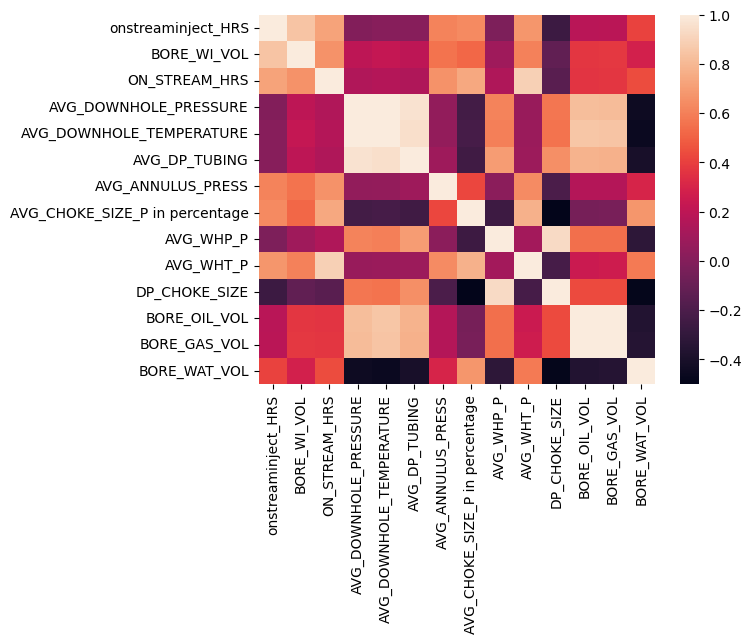

In [39]:
sns.heatmap(df.corr())

In [49]:
corr_df=pd.DataFrame(df.corr()[output_col].sort_values(ascending=False)[1:])
corr_df.columns=['Corr']
corr_df

,Corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [52]:
input_columns=corr_df[(abs(corr_df['Corr'])>0.2) & (corr_df['Corr']<0.90)].index

In [53]:
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

In [54]:
# MOVE TO ML

In [74]:
X=df[input_columns];y=df[output_col].fillna(0)

In [75]:
#y=f(X)+e

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

<AxesSubplot: >

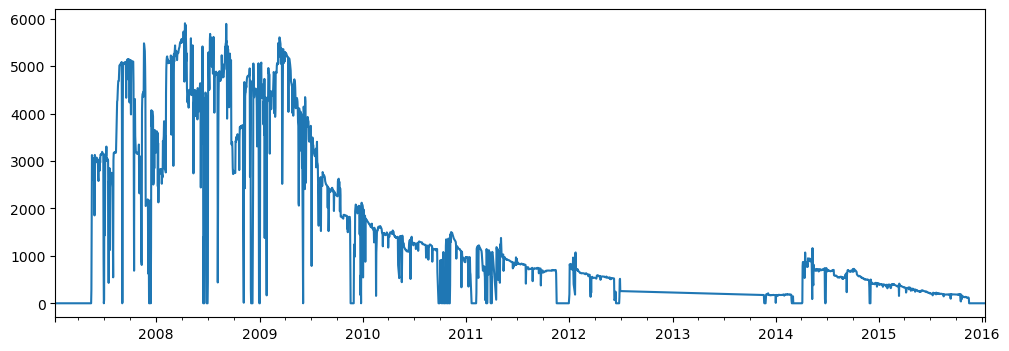

In [77]:
df['BORE_OIL_VOL'].plot(figsize=(12,4))

In [78]:
df['BORE_OIL_VOL'][2000:2500]=np.nan

C:\Users\aatmi\AppData\Local\Temp\ipykernel_70564\3294142148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BORE_OIL_VOL'][2000:2500]=np.nan


<AxesSubplot: >

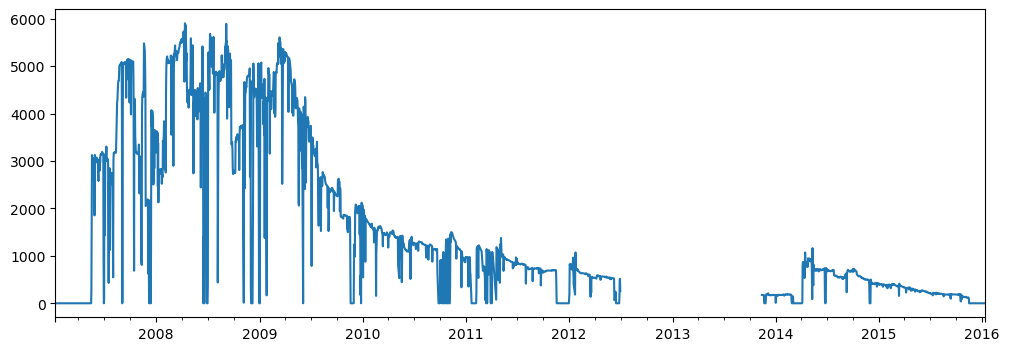

In [79]:
df['BORE_OIL_VOL'].plot(figsize=(12,4))

In [80]:
#PROPER METHOD FOR NULL

In [81]:
df['BORE_OIL_VOL']=df['BORE_OIL_VOL'].interpolate()

In [82]:
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1391.824977,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1648.341788,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,208.901198,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [83]:
train_length=3000 #days

X_train , y_train =X.iloc[:train_length,:] , y[:train_length]


X_test , y_test =X.iloc[train_length:, :],y[train_length:]

In [84]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [85]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression

#from sklearn.ensemble import RandomForestRegressor

lm=LinearRegression()

In [87]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [88]:
yp_train=lm.predict(X_train_scaled)

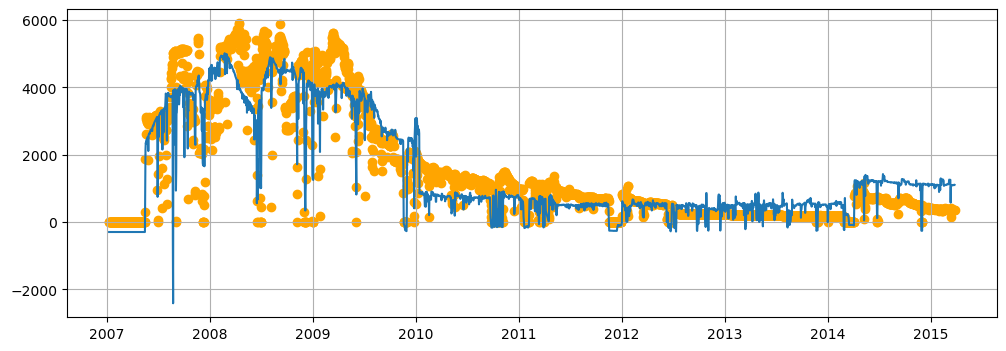

In [89]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length],y_train,color='orange')

plt.plot(df.index[:train_length],yp_train)

plt.grid()

In [90]:
yp_test=lm.predict(X_test_scaled)

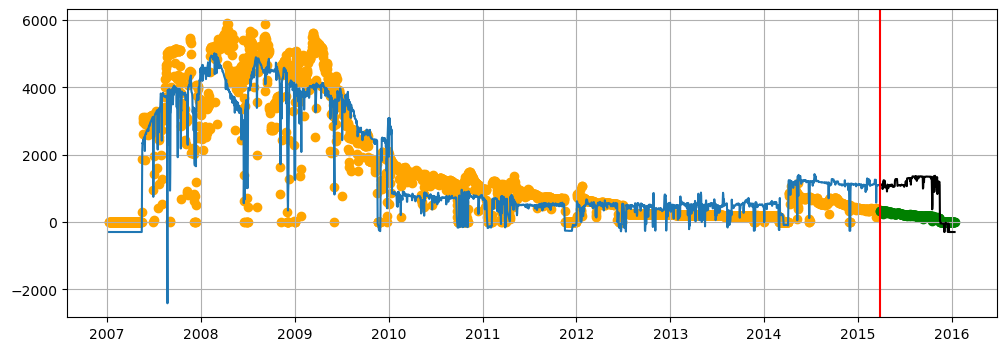

In [93]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length],y_train,color='orange')
plt.plot(df.index[:train_length],yp_train)


plt.scatter(df.index[train_length:],y_test,color='green')
plt.plot(df.index[train_length:],yp_test,color='black')

plt.axvline(df.index[train_length],color='red')

plt.grid()

In [94]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [95]:
#RANDOM FOREST

In [96]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [97]:
rf = RandomForestRegressor()

In [99]:
rf.fit(X_train,y_train)

yp_train = rf.predict(X_train)

yp_test = rf.predict(X_test)

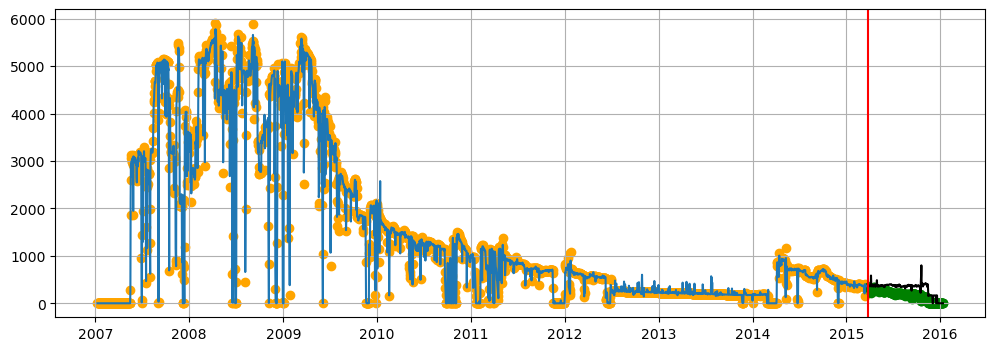

In [100]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length],y_train,color='orange')
plt.plot(df.index[:train_length],yp_train)


plt.scatter(df.index[train_length:],y_test,color='green')
plt.plot(df.index[train_length:],yp_test,color='black')

plt.axvline(df.index[train_length],color='red')

plt.grid()

In [111]:
rf.feature_importances_

array([0.76930984, 0.06472182, 0.04116864, 0.01832124, 0.00855451,
       0.00571354, 0.04241792, 0.01957458, 0.03021791])

In [101]:
df_model_preparation = df[df.index.year <=2014]
df_model_testing = df[df.index.year>=2015]

In [102]:
df_model_preparation.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df_original = df_model_preparation.copy()

In [104]:
df = df_original.loc[:,['BORE_OIL_VOL']]

In [105]:
df

,BORE_OIL_VOL
2007-01-09,0.0
2007-01-10,0.0
2007-01-11,0.0
2007-01-12,0.0
2007-01-13,0.0
...,...
2014-12-27,426.0
2014-12-28,423.0
2014-12-29,425.0
2014-12-30,419.0


<AxesSubplot: >

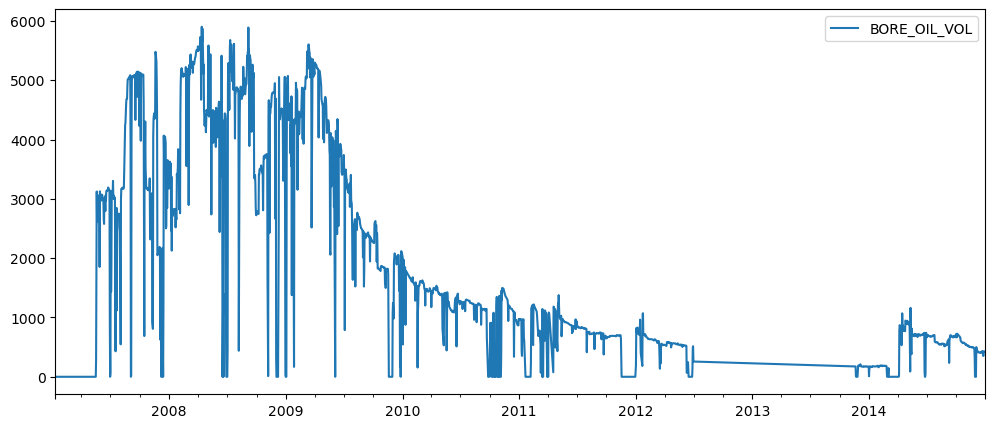

In [106]:
df.plot(figsize=(12,5))

In [112]:
df.shift(1)

,BORE_OIL_VOL
2007-01-09,NaN
2007-01-10,0.0
2007-01-11,0.0
2007-01-12,0.0
2007-01-13,0.0
...,...
2014-12-27,427.0
2014-12-28,426.0
2014-12-29,423.0
2014-12-30,425.0


In [115]:
df.corr()

,BORE_OIL_VOL
BORE_OIL_VOL,1.0


In [116]:
window= 60

In [124]:
def TS_to_Xy(df,n_lags=3, window=window):
    
    shifted_ys = []
    
    for i in range(1,n_lags+1):
        df[f'y_{i}'] = 0
        df[f'y_{i}'] = df.shift(i+window)
    
    
    
    return df

In [125]:
df_Xy = TS_to_Xy(df.rolling('30D').mean(),1)

ValueError: Columns must be same length as key

In [22]:
df_Xy.head()

NameError: name 'df_Xy' is not defined

In [23]:
df_Xy = df_Xy.fillna(method='bfill')

NameError: name 'df_Xy' is not defined

In [24]:
df_Xy['y_1'].plot(figsize=(12,5))

NameError: name 'df_Xy' is not defined

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X = df_Xy[[col for col in df_Xy.columns if col.startswith('y')]]
y = df_Xy['BORE_OIL_VOL']

NameError: name 'df_Xy' is not defined

In [829]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=False)

In [830]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [831]:
rf = RandomForestRegressor()

In [832]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [833]:
yp_train = rf.predict(X_train)

Text(0.5, 1.0, 'RMSE = 451.81485162250567')

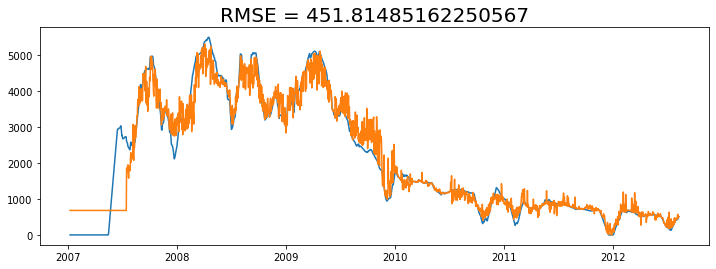

In [834]:
plt.figure(figsize=(12,4))

plt.plot(X_train.index, y_train)
plt.plot(X_train.index, yp_train)

plt.title(f'RMSE = {np.sqrt(mean_squared_error(y_train,yp_train))}', size=20)

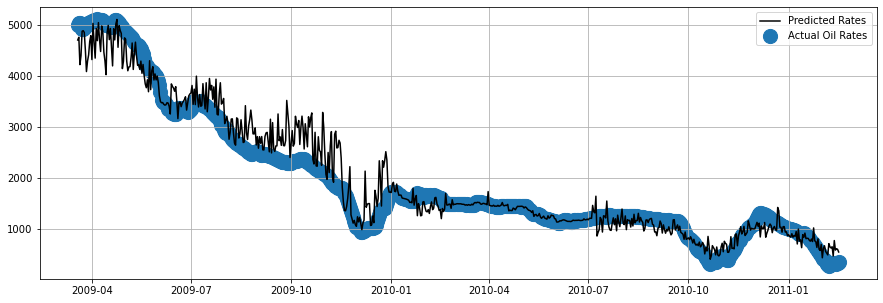

In [835]:
ti = 800;  tf = 1500 

plt.figure(figsize=(15,5))

plt.scatter(df_Xy.index[ti:tf] , df_Xy['BORE_OIL_VOL'][ti:tf], marker='o', label='Actual Oil Rates', s=200)
plt.plot(df_Xy.index[ti:tf] , rf.predict(df_Xy[['BORE_OIL_VOL']][ti-window:tf-window]),color='k', label='Predicted Rates')


# plt.plot(df_Xy.index[ti:tf] , df_Xy['BORE_OIL_VOL'][ti:tf], marker='x', label='Actual Oil Rates')

plt.grid()
plt.legend()

In [836]:
yp_test = rf.predict(X_test)

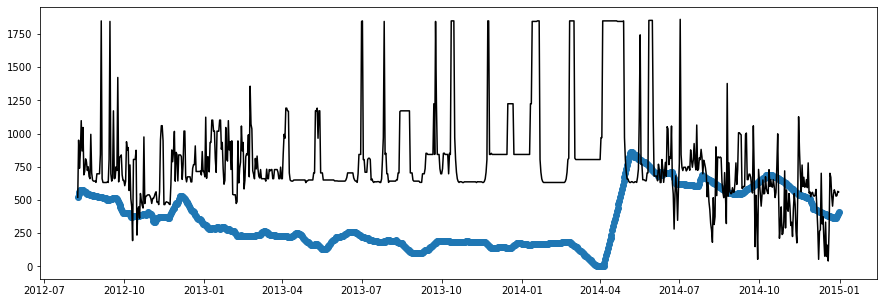

In [837]:
plt.figure(figsize=(15,5))
plt.scatter(X_test.index, y_test)
plt.plot(X_test.index, yp_test, color='k')

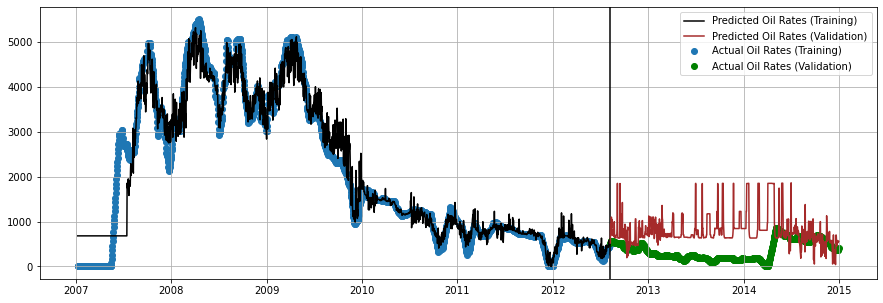

In [838]:
plt.figure(figsize=(15,5))






plt.scatter(X_train.index, y_train, label='Actual Oil Rates (Training)')
plt.plot(X_train.index, yp_train, color='k', label='Predicted Oil Rates (Training)')



plt.axvline(X_test.index[0], color='k')

plt.scatter(X_test.index, y_test, color='green', label='Actual Oil Rates (Validation)')
plt.plot(X_test.index, yp_test, color='brown', label='Predicted Oil Rates (Validation)')




plt.grid()
plt.legend()

In [839]:
X_test

,y_1
2012-08-09,517.833333
2012-08-10,502.288889
2012-08-11,486.366667
2012-08-12,471.266667
2012-08-13,461.233333
...,...
2014-12-27,645.100000
2014-12-28,641.533333
2014-12-29,637.500000
2014-12-30,631.866667


## Forecasting

In [840]:
last_input_rates = X_test.iloc[-window:,0:]

next_forecasts = np.array(rf.predict(last_input_rates))

In [841]:
# len(next_forecasts)
df_model_testing.index[:window]

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01',
               '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05',
               '2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09',
               '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
               '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17',
               '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
               '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
      

In [842]:
df_model_testing

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2015-01-01,24.0,4329,24.0,0.0,0.0,29.851,11.949,97.91667,29.851,78.719,0.791,416.0,63439.0,1130.0
2015-01-02,24.0,4302,24.0,0.0,0.0,29.568,12.034,97.91667,29.568,79.787,0.563,386.0,58583.0,1106.0
2015-01-03,24.0,4357,24.0,0.0,0.0,28.611,12.058,100.00000,28.611,80.596,0.533,392.0,59618.0,1143.0
2015-01-04,24.0,4629,24.0,0.0,0.0,26.566,12.131,100.00000,26.566,81.662,0.579,408.0,61965.0,1176.0
2015-01-05,21.5,4174,24.0,0.0,0.0,26.607,12.155,100.00000,26.607,81.569,0.627,405.0,61606.0,1210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.000,19.959,0.90339,0.000,0.000,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.000,19.959,0.90339,0.000,0.000,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.000,19.959,0.90339,0.000,0.000,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.000,19.959,0.90339,0.000,0.000,0.026,0.0,0.0,0.0


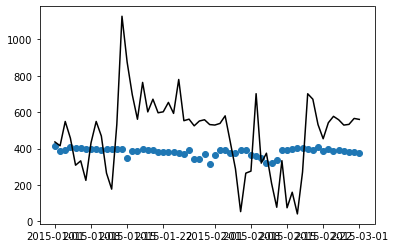

In [843]:
plt.scatter(df_model_testing.index[:window], df_model_testing['BORE_OIL_VOL'][:window], label='Actual Future Rates')
plt.plot(df_model_testing.index[:window], next_forecasts.reshape(window,1), label='Model Forecasted Rates', color='k')

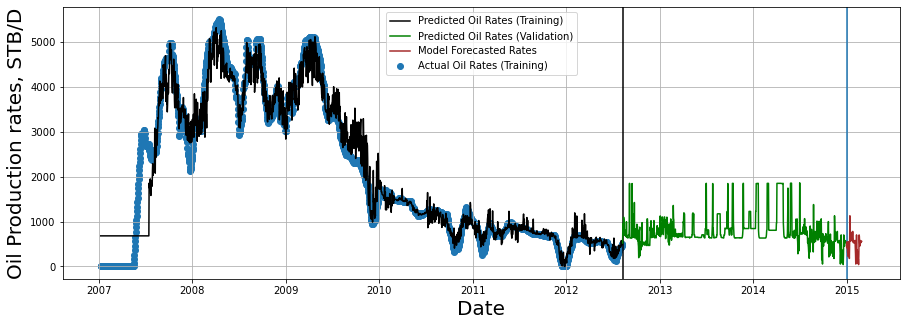

In [848]:
plt.figure(figsize=(15,5))






plt.scatter(X_train.index, y_train, label='Actual Oil Rates (Training)')
plt.plot(X_train.index, yp_train, color='k', label='Predicted Oil Rates (Training)')



plt.axvline(X_test.index[0], color='k')

# plt.scatter(X_test.index, y_test, color='green', label='Actual Oil Rates (Validation)')
plt.plot(X_test.index, yp_test, label='Predicted Oil Rates (Validation)', color='green')

plt.axvline(df_model_testing.index[0])

# plt.scatter(df_model_testing.index[:window], df_model_testing['BORE_OIL_VOL'][:window], label='Actual Future Rates')
plt.plot(df_model_testing.index[:window], next_forecasts, label='Model Forecasted Rates', color='brown')






plt.ylabel('Oil Production rates, STB/D', size=20);
plt.xlabel('Date', size=20)
plt.grid()
plt.legend()